In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import houses as ho
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ARDRegression, LinearRegression, BayesianRidge

In [2]:
df2 = pd.read_csv('datasets/house_train_raw.csv')
df, numerical, cat_ord = ho.transform(df2, 0)

In [3]:
# get the locations
X = df.drop(columns='SalePrice', axis=1).copy()
#X = df.loc[:, numerical+cat_ord]
y = df.loc[:, 'SalePrice'].copy()

# Aplicamos normalizacion de los datos
X.loc[:, numerical], mu, sigma = ho.featureNormalize(X.loc[:,numerical])

# Agregamos variables de segundo grado de variables numericas
grado = 4
for feature in numerical: #+cat_ord:
    X = pd.concat([X, ho.polyFeatures(X[feature],grado).loc[:,1:]], axis=1).copy()

grado = 2
for feature in cat_ord: #+cat_ord:
    X = pd.concat([X, ho.polyFeatures(X[feature],grado).loc[:,1:]], axis=1).copy()

#X['constant'] = 1

# get x_train and y_train
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=2)

x_t = np.array(X_train)
y_t = np.array(y_train)

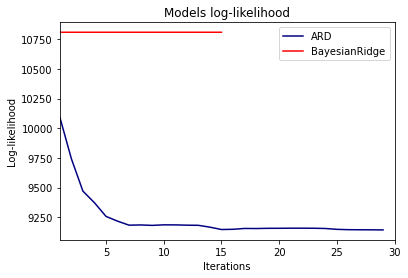

In [4]:
olr = LinearRegression().fit(x_t, y_t)
brr = BayesianRidge(compute_score=True, n_iter=30).fit(x_t, y_t)
ard = ARDRegression(compute_score=True, n_iter=30).fit(x_t, y_t)

ard_scores = -np.array(ard.scores_)
brr_scores = -np.array(brr.scores_)
plt.plot(ard_scores, color="navy", label="ARD")
plt.plot(brr_scores, color="red", label="BayesianRidge")
plt.ylabel("Log-likelihood")
plt.xlabel("Iterations")
plt.xlim(1, 30)
plt.legend()
_ = plt.title("Models log-likelihood")

In [5]:
predict_olr = olr.predict(X_val.values)
predict_bbr = brr.predict(X_val.values)
predict_ard = ard.predict(X_val.values)

In [6]:
print(ho.rmsle(predict_olr, y_val))
print(ho.rmsle(predict_bbr, y_val))
print(ho.rmsle(predict_ard, y_val))

0.13968618204137165
0.3613816887212761
0.14111351111545975
